# 대전광역시 흡연위험지수 산출 및 시각화

지자체에서 제공하는 공공데이터를 토대로 흡연 및 금연지역과 관련된 데이터가 포함되어있습니다.  
EDA의 목표는 흡연지수산출을 위한 각 feature들의 패턴 및 인사이트 발견입니다.

## 데이터셋 살펴보기

총 7개의 전처리된 csv 파일이 준비되었고, 데이터 병합작업을 통해 df.pickle 파일로 EDA를 진행합니다.

1. 과태료 (2807, 7)
2. 금연구역 (44475, 7)
3. 병의원 (2300, 7)
4. 주차장 (850, 6)
5. 상권정보 (75145, 9)
6. 지역사회건강조사 설문 (4610, 6)
7. 주민등록인구 (164, 9)

## 라이브러리 및 함수 준비

In [188]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 100, "display.max_columns", 50)
from datetime import date

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

color = sns.color_palette()

# import matplotlib.font_manager as fm  # 폰트 관련 용도
# font_path = 'C:/Users/JBY/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
# font_name = fm.FontProperties(fname=font_path, size=10).get_name()
# plt.rc('font', family=font_name, size=15)
# plt.rcParams['axes.unicode_minus'] = False
# fm._rebuild()

In [189]:
# Annotate text on graph
def annotate_text(p, append_to_text='%'):
    for p in ax.patches:
        txt = str(p.get_height().round(2)) + append_to_text
        txt_x = p.get_x() + p.get_width()/2.
        txt_y = 0.92*p.get_height()
        ax.text(txt_x,txt_y,txt, fontsize=20, color='#004235', ha='center', va='bottom')

In [190]:
PATH = 'D:/project/데이터 분석 프로젝트/이노포스트/data/전처리 완료 데이터/'
# PATH = 'G:/다른 컴퓨터/My_desktop/project/데이터 분석 프로젝트/이노포스트/data/전처리 완료 데이터/'


In [191]:
# colab용 구글 드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

## 데이터 로드

In [192]:
# fine = pd.read_csv(PATH + '과태료_전처리(완)_1205.csv', encoding='cp949')
# nszone = pd.read_csv(PATH + '금연구역_전처리(완)_1205.csv', encoding='cp949')
# hospital = pd.read_csv(PATH + '병의원_전처리(완)_1205.csv', encoding='cp949')
# parking = pd.read_csv(PATH + '주차장_전처리(완)_1205.csv', encoding='cp949')
# comm = pd.read_csv(PATH + '상권정보_전처리(완)_1205.csv', encoding='cp949')
# survey = pd.read_csv(PATH + '지역사회건강조사_전처리(완)_1205.csv', encoding='cp949')
# population = pd.read_csv(PATH + '주민등록인구_전처리(완)_1205.csv', encoding='cp949')

# print('done')

In [193]:
# df 불러오기
df = pd.read_pickle(PATH + 'EDA_1207.pkl')

In [194]:
df.head(2)

,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
0,설문,대덕구,1,0.0,0.0,0,0,0,0,0,0,0,0,0,남자,1,8,0,0,0,0,0
1,설문,대덕구,1,0.0,0.0,0,0,0,0,0,0,0,0,0,여자,8,8,0,0,0,0,0


In [195]:
df.shape

(130278, 22)

## 과태료

체크리스트

* 과태료의 형태 
* 구 별 과태료 발생 현황
    * 액수 합계
    * 발생 건수 합계
* 행정동 별 과태료 발생 현황
     * 액수 합계
     * 발생 건수 합계
* 연도별 과태료 발생 추이

In [196]:
fine = df[df['구분']=='과태료'].reset_index()
fine.head(2)

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
0,917,과태료,대덕구,대화동,127.416588,36.363914,2016-10-04,80000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,918,과태료,대덕구,대화동,127.415047,36.363464,2017-11-27,80000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [197]:
fine['index'] = fine['index'].reset_index(drop=True)

In [198]:
# null check
fine.isnull().sum()

index      0
구분         0
구          0
행정동        0
경도         0
위도         0
부과일자       0
최초본세       0
분류         0
이름         0
병원유형       0
주차장유형      0
대분류        0
중분류        0
소분류        0
성별         0
담배흡연       0
액상흡연       0
total      0
0~19세      0
20~39세     0
40~59세     0
60 over    0
dtype: int64

### 과태료 확인

In [199]:
print(sorted(fine['최초본세'].unique()))
fine['최초본세'].value_counts()

[12000, 15000, 24000, 30000, 40000, 50000, 80000, 100000, 1360000]


80000      1778
100000      802
24000       141
40000        35
30000        29
50000        14
12000         3
15000         1
1360000       1
Name: 최초본세, dtype: int64

1.2만원부터 136만원까지 존재하며  
8만원과 10만원이 가장 많이 부과되었다.  
136만원?

In [200]:
fine[fine['최초본세'] > 100000]

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
2620,121853,과태료,중구,용두동,127.41449,36.32407,2015-04-10,1360000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


이상치로 보인인다.  

In [201]:
# 136만원 제거
idx = fine[fine['최초본세'] > 200000].index
fine = fine.drop(idx)
df = df.drop(idx)

### 구 & 행정동 별 과태료 발생현황

In [202]:
temp_fine = fine.groupby('구')['최초본세'].value_counts()
temp_fine

구    최초본세  
대덕구  80000     175
     100000     98
     24000       9
     40000       6
     50000       2
동구   80000     118
     100000     47
     24000      17
     30000       4
     40000       3
서구   80000     977
     100000    473
     24000      74
     40000      16
     30000      13
     50000       8
     12000       1
     15000       1
유성구  80000     180
     100000     65
     24000      19
     30000       6
     50000       2
     12000       1
     40000       1
중구   80000     328
     100000    119
     24000      22
     40000       9
     30000       6
     50000       2
     12000       1
Name: 최초본세, dtype: int64

In [203]:
# 구 별 과태료 액수의 합계
print(fine.groupby('구')['최초본세'].sum())
print(fine.groupby('구')['최초본세'].sum()/fine['최초본세'].sum())

구
대덕구     24356000
동구      14788000
서구     128693000
유성구     21688000
중구      39320000
Name: 최초본세, dtype: uint32
구
대덕구    0.106430
동구     0.064620
서구     0.562359
유성구    0.094772
중구     0.171819
Name: 최초본세, dtype: float64


전체 과태료의 56%가 서구에서 발생했다.

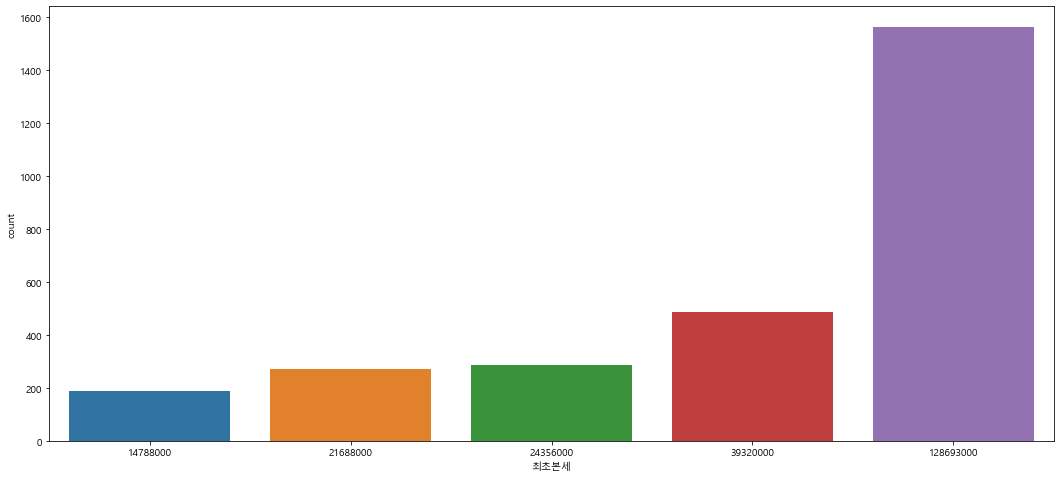

In [204]:
plt.figure(figsize=(18,8))
y = fine.groupby('구')['최초본세'].sum()
sns.countplot(x=fine['구'], data=y)
plt.show()

# x축을 구, y축을 과태료의 합계로 표현하고 싶은데..

In [205]:
temp_fine2 = fine.groupby('행정동')['최초본세'].count().sort_values(ascending=False)
temp_fine2

행정동
갈마2동     246
괴정동      161
산성동      133
월평1동     109
탄방동      104
용문동       92
갈마1동      91
내동        88
둔산2동      77
은행선화동     68
관저2동      65
가장동       59
둔산3동      54
관저1동      51
변동        48
비래동       46
월평3동      44
둔산1동      44
문화2동      42
온천2동      39
중리동       39
복수동       39
도마2동      37
도마1동      37
문화1동      36
중촌동       30
온천1동      30
도안동       29
덕암동       28
진잠동       28
원신흥동      26
가양2동      25
법1동       25
만년동       25
유천2동      24
오정동       24
용전동       24
신탄진동      23
월평2동      23
석봉동       23
노은3동      23
유천1동      21
석교동       21
태평2동      20
노은1동      20
송촌동       20
목동        20
구즉동       19
대흥동       19
신성동       19
회덕동       18
용운동       18
법2동       18
관평동       18
상대동       18
효동        17
가수원동      17
목상동       16
삼성동       16
정림동       15
전민동       14
노은2동      14
용두동       13
오류동       12
홍도동       12
태평1동      11
가양1동      10
자양동       10
대화동       10
대동        10
부사동        9
판암2동       9
성남동        8
신인동        8
기성동        8
산내동        7
중앙동     

In [206]:
temp_fine2.describe().astype(np.uint32)

count     83
mean      33
std       37
min        0
25%       13
50%       21
75%       39
max      246
Name: 최초본세, dtype: uint32

각 행정동은 평균적으로 30번의 흡연이 적발되었다.  
가장 많이 적발된 행정동은 갈마2동으로 246건이다.

In [207]:
# 행정동 기준 과태료 발생 건수 top20
temp_fine2[0:20]

행정동
갈마2동     246
괴정동      161
산성동      133
월평1동     109
탄방동      104
용문동       92
갈마1동      91
내동        88
둔산2동      77
은행선화동     68
관저2동      65
가장동       59
둔산3동      54
관저1동      51
변동        48
비래동       46
월평3동      44
둔산1동      44
문화2동      42
온천2동      39
Name: 최초본세, dtype: int64

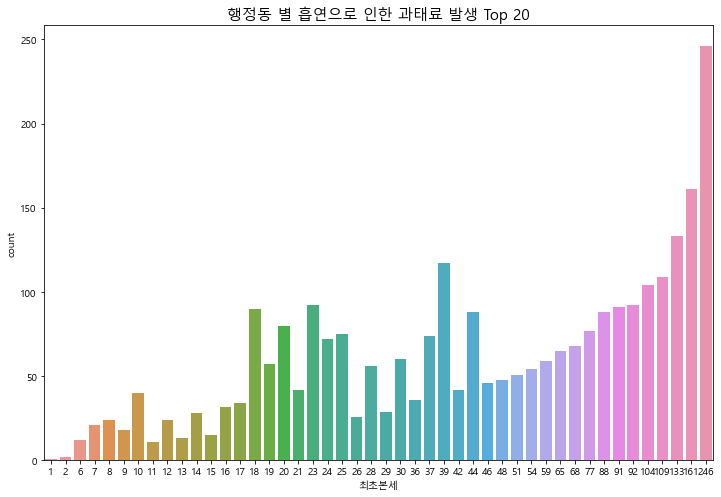

In [208]:
plt.figure(figsize=(12, 8))
plt.title('행정동 별 흡연으로 인한 과태료 발생 Top 20', fontsize=15)
sns.countplot(x=fine['행정동'], data=temp_fine2)
plt.show()

# x축 행정동으로 바꾸고싶은데..

## 금연구역

In [209]:
nszone = df[df['구분']=='금연구역'].reset_index(drop=True)
nszone.head(3)

,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
0,금연구역,대덕구,구즉동,127.387474,36.434422,0,0,청사,문평119안전센터,0,0,0,0,0,0,0,0,0,0,0,0,0
1,금연구역,대덕구,대화동,127.410622,36.364574,0,0,학원,미레도음악학원,0,0,0,0,0,0,0,0,0,0,0,0,0
2,금연구역,대덕구,대화동,127.411880,36.367062,0,0,음식점,식풍경대화점,0,0,0,0,0,0,0,0,0,0,0,0,0


In [210]:
print(nszone['분류'].nunique())
print(nszone['분류'].unique())

52
['청사' '학원' '음식점' '의료기관' '체육시설업' '어린이운송용승합차' '어린이집' '어린이놀이시설' '사회복지시설'
 '복합건축물' '학교' '목욕장' '게임제공업소시설' '도서관' '청소년활동시설' '대규모점포시설' '만화대여업소시설' '대학교'
 '학교교과교습학원' '어린이운송용 승합자동차' '체육시설' '게임제공업소' '유치원' '사무용건축물' '관광숙박업소' '공동주택'
 '보건소' '도시공원' '만화대여업소' '교통관련시설' '대규모점포 및 지하도 상점가' '전통시장' '공연장'
 '담배판매업소 및 담배자동판매기' '식품자동판매기영업소' '연면적 1천제곱미터 이상 건축물' '어린이운송용 및 교통시설'
 '신고체육시설' '일반음식점 및 휴게음식점' '대규모점포' '만화' '담배소매업소' '게임산업' '어린이운송용차량' '숙박업소'
 '공장' '복합용도' '지역아동센터' '실내체육시설' '음식점(휴게, 일반, 제과)' '담배소매인업소' '대규모점포, 지하상점가']


In [211]:
nszone[nszone['분류'].str.contains('놀이시설')]

,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
79,금연구역,대덕구,대화동,127.409561,36.364571,0,0,어린이놀이시설,대화동 오광무지개아파트 놀이터,0,0,0,0,0,0,0,0,0,0,0,0,0
80,금연구역,대덕구,대화동,127.413254,36.363064,0,0,어린이놀이시설,대화동 소라아파트 놀이터,0,0,0,0,0,0,0,0,0,0,0,0,0
81,금연구역,대덕구,대화동,127.417473,36.366535,0,0,어린이놀이시설,세원풍남아파트 놀이터,0,0,0,0,0,0,0,0,0,0,0,0,0
82,금연구역,대덕구,대화동,127.416588,36.363914,0,0,어린이놀이시설,대화동 두레아파트 놀이터,0,0,0,0,0,0,0,0,0,0,0,0,0
83,금연구역,대덕구,대화동,127.413193,36.363377,0,0,어린이놀이시설,서현어린이집 실외놀이터,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44399,금연구역,중구,태평2동,127.391342,36.318020,0,0,어린이놀이시설,버드내마을 1단지아파트 112동뒤 어린이놀이시설,0,0,0,0,0,0,0,0,0,0,0,0,0
44400,금연구역,중구,태평2동,127.391342,36.318020,0,0,어린이놀이시설,버드내마을 1단지아파트 115동앞 어린이놀이시설,0,0,0,0,0,0,0,0,0,0,0,0,0
44401,금연구역,중구,태평2동,127.391342,36.318020,0,0,어린이놀이시설,버드내마을 1단지아파트 130동앞 어린이놀이시설,0,0,0,0,0,0,0,0,0,0,0,0,0
44402,금연구역,중구,태평2동,127.391342,36.318020,0,0,어린이놀이시설,"버드내마을 1단지아파트 137동,139동앞 어린이놀이시설",0,0,0,0,0,0,0,0,0,0,0,0,0


## 상권정보

체크리스트

* 공공시설 추출
  * 목욕탕
  * 공원
  * 놀이터
* 흡연취약계층이 주로 이용하는 시설들
  * 유치원 / 초등학교 / 중학교 / 고등학교
  * 학원
  * PC방
  * 태권도장 등 운동관련
  * ???
* 흡연이 자주 발생하는 시설들
  * 음식점 앞
  * 술집 앞
  * 당구장 앞?
* 행정동 별 상권 확인
  * 공공시설 분포 확인
  * 학원시설 분포 확인
  * 레저시설 분포 확인

In [212]:
comm = df[df['구분']=='상권정보'].reset_index()
comm.head(3)

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
0,1323,상권정보,대덕구,대화동,127.402939,36.365295,0,0,0,씨엠바이오메드,0,0,소매,사무/문구/컴퓨터,사무/문구용품,0,0,0,0,0,0,0,0
1,1324,상권정보,대덕구,대화동,127.412880,36.363522,0,0,0,이레컴퓨터,0,0,소매,사무/문구/컴퓨터,컴퓨터/사무용기기종합,0,0,0,0,0,0,0,0
2,1325,상권정보,대덕구,대화동,127.402939,36.365295,0,0,0,우리OA,0,0,소매,사무/문구/컴퓨터,사무/문구용품,0,0,0,0,0,0,0,0


In [213]:
print(comm['중분류'].unique())

['사무/문구/컴퓨터' '이/미용/건강' '중식' '건강/미용식품' '음/식료품소매' '한식' '자동차/이륜차'
 '가정/주방/인테리어' '종합소매점' '철물/난방/건설자재소매' '대중목욕탕/휴게' '유흥주점' '자동차/자동차용품' '분식'
 '세탁/가사서비스' '화장품소매' '운동/경기용품소매' '닭/오리요리' '중고품소매/교환' '유아교육' '의복의류' '기타음식업'
 '시계/귀금속소매' '장례/묘지' '사진/광학/정밀기기소매' '패스트푸드' '주택수리' '인력/고용/용역알선' '커피점/카페'
 '학원-음악미술무용' '기타서비스업' '부동산중개' '별식/퓨전요리' '가전제품소매' '무도/유흥/가무' '개인/가정용품수리'
 '광고/인쇄' '예식/의례/관혼상제' '페인트/유리제품소매' '기타판매업' '부페' '선물/팬시/기념품' 'PC/오락/당구/볼링등'
 '가방/신발/액세서리' '모텔/여관/여인숙' '의약/의료품소매' '사진' '학원-보습교습입시' '일식/수산물' '운송/배달/택배'
 '주유소/충전소' '실내운동시설' '학원-예능취미체육' '가구소매' '책/서적/도서' '양식' '취미/오락관련소매' '분양'
 '제과제빵떡케익' '애견/애완/동물' '행사/이벤트' '운영관리시설' '학원기타' '학원-어학' '예술품/골동품/수석/분재'
 '대행업' '물품기기대여' '캠프/별장/펜션' '개인서비스' '도서관/독서실' '학원-창업취업취미' '음식배달서비스'
 '평가/개발/관리' '학문교육기타' '학원-자격/국가고시' '요가/단전/마사지' '법무세무회계' '연극/영화/극장' '실외운동시설'
 '민박/하숙' '스포츠/운동' '놀이/여가/취미' '종교용품판매' '학원-컴퓨터' '호텔/콘도' '유아용품' '경마/경륜/성인오락'
 '유스호스텔']


In [214]:
comm_aca = comm[comm['소분류'].str.contains('학원')]
print(comm_aca['소분류'].unique())

['학원-입시' '학원-기타' '학원-외국어/어학' '학원-주산암산부기속셈' '학원(종합)' '학원-경영' '학원-공예'
 '학원-간호조무사' '학원-국악' '학원-어린이영어' '학원-웅변' '학원-스포츠/재즈댄스' '학원-자동차운전' '학원-에어로빅'
 '학원-펜글씨/한문' '학원-중장비' '학원-도배' '컴퓨터학원' '학원-목공예' '학원-요리' '학원-미용' '학원-바둑'
 '학원-가요' '학원-무용' '학원-제과기술' '학원-꽃꽃이' '학원-전자통신' '학원-사교춤' '학원-애견미용' '학원-서당'
 '학원-말더듬' '학원-심리변론' '학원-속독' '학원-공인중개사' '학원-배우/탤런트' '학원-검정고시' '학원-디자인'
 '학원-스튜디어스' '학원-편입' '학원-칵테일' '학원-국가고시' '학원-모델' '학원-항공기술' '학원-피부미용' '학원-사진'
 '학원-마술' '학원-미싱자수' '학원-전기기술' '학원-경리' '학원-목욕관리사' '학원-만화영화' '학원-실내운전'
 '학원-속기' '학원-텔렉스/통신' '학원/국가고시' '학원-복장']


In [215]:
comm_aca.groupby('행정동')['소분류'].count()

행정동
1          0
가수원동      15
가양1동      12
가양2동      30
가장동       24
갈마1동      34
갈마2동      44
관저1동      25
관저2동     174
관평동       71
괴정동       20
구즉동       57
기성동        3
내동        67
노은1동      90
노은2동      88
노은3동     112
대동        24
대사동        7
대청동        1
대화동        5
대흥동       51
덕암동       16
도마1동      33
도마2동      23
도안동       91
둔산1동     171
둔산2동     116
둔산3동      51
만년동       31
목동        52
목상동       11
문창동        4
문화1동      36
문화2동      22
법1동       16
법2동       20
변동        22
복수동       62
부사동        7
비래동       19
산내동       27
산성동       20
삼성동       12
상대동       50
석교동        6
석봉동       32
성남동       21
송촌동      126
신성동       56
신인동        7
신탄진동      32
오류동       26
오정동       21
온천1동      37
온천2동     105
용두동       19
용문동       18
용운동       44
용전동       22
원신흥동      58
월평1동      21
월평2동      37
월평3동      17
유천1동      37
유천2동      15
은행선화동     52
자양동       16
전민동       86
정림동       30
중리동       33
중앙동       20
중촌동       20
진잠동       69
탄방동      100
태평1동      18
태평2동    

## 주차장

체크리스트
* 주차장의 분포
  * 구 별 주차장 개수
  * 행정동 별 주차장 개수
* 주차장 유형별 비율
  * 노상 주차장에서 흡연이 많이 발생하지 않을까?
  * 노상주차장: 큰 도로변에 주차구획이 그려진 공용주차장 (정부/지자체 관할)
  * 노외주차장: 지상, 지하 등 별도의 대지에 설치되어 제공되는 주차장 (지자체/민영)

In [216]:
parking = df[df['구분']=='주차장'].reset_index()
parking.head(3)

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
0,1321,주차장,대덕구,대화동,127.417603,36.363564,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
1,1322,주차장,대덕구,대화동,127.417603,36.363564,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
2,3598,주차장,대덕구,목상동,127.404182,36.446407,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0


In [217]:
parking_pivot = pd.pivot_table(parking,
                               index = ['구','행정동'],
                               columns = '주차장유형',
                               values = '경도',
                               aggfunc = 'count',
                               margins = True
                              )


parking_pivot = parking_pivot[['노상','노외']]
parking_pivot

주차장유형      노상   노외
구   행정동           
대덕구 1       0    0
    가수원동    0    0
    가양1동    0    0
    가양2동    0    0
    가장동     0    0
...       ...  ...
중구  학하동     0    0
    홍도동     0    0
    회덕동     0    0
    효동      0    0
All       496  354

[416 rows x 2 columns]

주차장 - 중구

In [218]:
p_junggu = parking['구'] == '중구'
junggu = parking[p_junggu]
junggu

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
479,110324,주차장,중구,대사동,127.428017,36.317337,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
480,110325,주차장,중구,대사동,127.419609,36.310795,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
481,110326,주차장,중구,대사동,127.424049,36.315029,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
482,110327,주차장,중구,대사동,127.420891,36.316753,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
483,110328,주차장,중구,대사동,127.420967,36.316933,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,129831,주차장,중구,태평2동,127.386520,36.316811,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
846,129832,주차장,중구,태평2동,127.387115,36.316071,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
847,129833,주차장,중구,태평2동,127.394058,36.326870,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
848,129834,주차장,중구,태평2동,127.386520,36.316811,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0


In [219]:
p_junggu_pivot = pd.pivot_table(junggu,
                               index = ['행정동'],
                               columns = '주차장유형',
                               values = '경도',
                               aggfunc = 'count',
                               margins = True
                              )


p_junggu_pivot = p_junggu_pivot[['노상','노외']]
p_junggu_pivot.sort_values('노상', ascending = False)

주차장유형,노상,노외
행정동,,
All,260,111
산성동,42,20
석교동,24,5
문화1동,24,14
중촌동,18,1
은행선화동,18,11
오류동,16,4
부사동,15,10
대흥동,15,10


Text(0.5, 1.0, '행정동별 노상, 노외 주차장 분포')

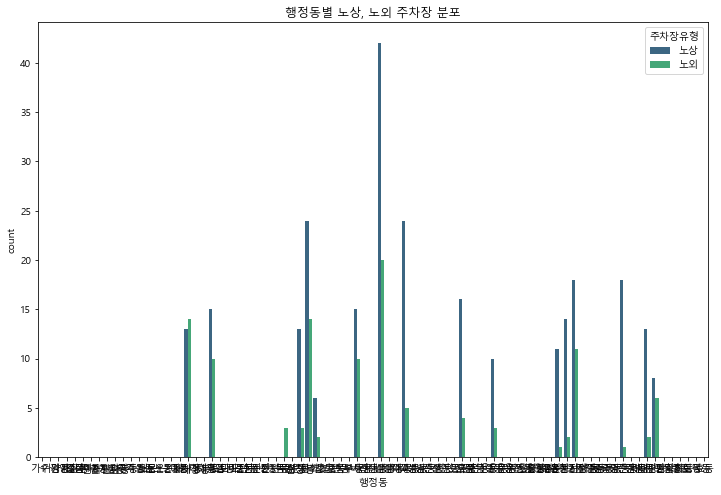

In [220]:
plt.figure(figsize=(12, 8))
park_j = sns.countplot(x = junggu['행정동'], hue = junggu['주차장유형'], palette = 'viridis')
park_j.set_title('행정동별 노상, 노외 주차장 분포')

주차장 - 유성구

In [221]:
p_yuseonggu = parking['구'] == '유성구'
yuseonggu = parking[p_yuseonggu]
yuseonggu

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
286,80257,주차장,유성구,관평동,127.393677,36.423187,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
287,80258,주차장,유성구,관평동,127.393677,36.423187,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
288,80259,주차장,유성구,관평동,127.392586,36.428959,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
289,80260,주차장,유성구,관평동,127.391777,36.426872,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
290,80261,주차장,유성구,관평동,127.390060,36.425079,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,108218,주차장,유성구,학하동,127.310295,36.356041,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
475,108219,주차장,유성구,학하동,127.306793,36.357834,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
476,108220,주차장,유성구,학하동,127.310326,36.356773,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
477,108221,주차장,유성구,학하동,127.293251,36.345615,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0


In [222]:
p_yuseonggu_pivot = pd.pivot_table(yuseonggu,
                               index = ['행정동'],
                               columns = '주차장유형',
                               values = '경도',
                               aggfunc = 'count',
                               margins = True
                              )


p_yuseonggu_pivot = p_yuseonggu_pivot[['노상','노외']]
p_yuseonggu_pivot.sort_values('노상', ascending = False)

주차장유형,노상,노외
행정동,,
All,100,93
온천1동,24,4
온천2동,24,5
신성동,14,9
노은1동,12,0
진잠동,7,8
노은2동,5,2
학하동,4,38
전민동,4,6


Text(0.5, 1.0, '행정동별 노상, 노외 주차장 분포')

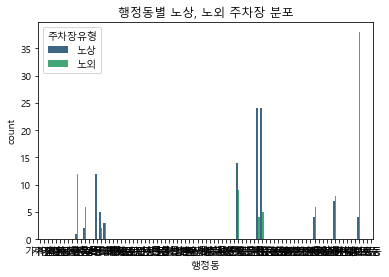

In [223]:
park_y = sns.countplot(x = yuseonggu['행정동'], hue = yuseonggu['주차장유형'], palette = 'viridis')
park_y.set_title('행정동별 노상, 노외 주차장 분포')

주차장 - 동구

In [224]:
p_donggu = parking['구'] == '동구'
donggu = parking[p_donggu]
donggu

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
88,18532,주차장,동구,가양1동,127.443314,36.339680,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
89,18533,주차장,동구,가양1동,127.440399,36.346684,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
90,18534,주차장,동구,가양1동,127.441704,36.340363,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
91,18535,주차장,동구,가양1동,127.443321,36.345634,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
92,18536,주차장,동구,가양1동,127.437576,36.339485,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,33235,주차장,동구,홍도동,127.422577,36.344627,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
248,34545,주차장,동구,효동,127.439903,36.314491,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
249,34546,주차장,동구,효동,127.439903,36.314491,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
250,34547,주차장,동구,효동,127.446533,36.316212,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0


In [225]:
p_donggu_pivot = pd.pivot_table(donggu,
                               index = ['행정동'],
                               columns = '주차장유형',
                               values = '경도',
                               aggfunc = 'count',
                               margins = True
                              )


p_donggu_pivot = p_donggu_pivot[['노상','노외']]
p_donggu_pivot.sort_values('노상', ascending = False)

주차장유형,노상,노외
행정동,,
All,96,68
삼성동,18,1
용운동,15,2
홍도동,14,0
판암1동,10,2
자양동,8,0
가양1동,6,4
가양2동,6,2
판암2동,4,2


Text(0.5, 1.0, '행정동별 노상, 노외 주차장 분포')

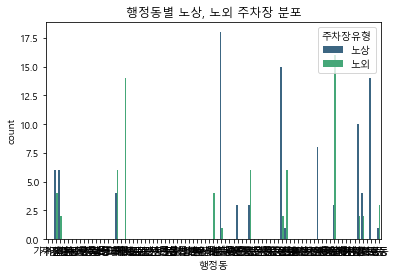

In [226]:
park_d = sns.countplot(x = donggu['행정동'], hue = donggu['주차장유형'], palette = 'viridis')
park_d.set_title('행정동별 노상, 노외 주차장 분포')

주차장 - 서구

In [227]:
p_seogu = parking['구'] == '서구'
seogu = parking[p_seogu]
seogu

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
252,39111,주차장,서구,갈마1동,127.364014,36.353500,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
253,39112,주차장,서구,갈마1동,127.364014,36.353500,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
254,41174,주차장,서구,갈마2동,127.376656,36.347668,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
255,41175,주차장,서구,갈마2동,127.376656,36.347668,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
256,57141,주차장,서구,둔산1동,127.388474,36.354687,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
257,57142,주차장,서구,둔산1동,127.388474,36.354687,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
258,57143,주차장,서구,둔산1동,127.388474,36.354687,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
259,57144,주차장,서구,둔산1동,127.388474,36.354687,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
260,60406,주차장,서구,둔산2동,127.383812,36.355072,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0
261,60407,주차장,서구,둔산2동,127.381989,36.355068,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0


In [228]:
p_seogu_pivot = pd.pivot_table(seogu,
                               index = ['행정동'],
                               columns = '주차장유형',
                               values = '경도',
                               aggfunc = 'count',
                               margins = True
                              )


p_seogu_pivot = p_seogu_pivot[['노상']]
p_seogu_pivot.sort_values('노상', ascending = False)

주차장유형,노상
행정동,
All,34
둔산2동,10
월평1동,8
둔산1동,4
탄방동,4
갈마1동,2
갈마2동,2
만년동,2
월평2동,2


Text(0.5, 1.0, '행정동별 노상, 노외 주차장 분포')

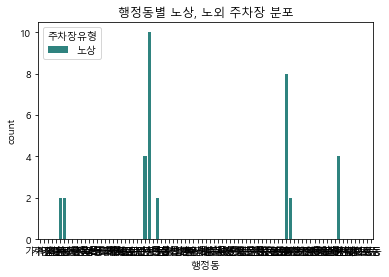

In [229]:
park_s = sns.countplot(x = seogu['행정동'], hue = seogu['주차장유형'], palette = 'viridis')
park_s.set_title('행정동별 노상, 노외 주차장 분포')

주차장 - 대덕구

In [230]:
p_daeduckgu = parking['구'] == '대덕구'
daeduckgu = parking[p_daeduckgu]
daeduckgu

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
0,1321,주차장,대덕구,대화동,127.417603,36.363564,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
1,1322,주차장,대덕구,대화동,127.417603,36.363564,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
2,3598,주차장,대덕구,목상동,127.404182,36.446407,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
3,3599,주차장,대덕구,목상동,127.404182,36.446407,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
4,4722,주차장,대덕구,법2동,127.428345,36.374352,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
5,4723,주차장,대덕구,법2동,127.428345,36.374352,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
6,5610,주차장,대덕구,비래동,127.449844,36.356720,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
7,5611,주차장,대덕구,비래동,127.448944,36.356701,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
8,5612,주차장,대덕구,비래동,127.452942,36.354618,0,0,0,0,0,노외,0,0,0,0,0,0,0,0,0,0,0
9,5613,주차장,대덕구,비래동,127.449959,36.354935,0,0,0,0,0,노상,0,0,0,0,0,0,0,0,0,0,0


In [231]:
p_daeduckgu_pivot = pd.pivot_table(daeduckgu,
                               index = ['행정동'],
                               columns = '주차장유형',
                               values = '경도',
                               aggfunc = 'count',
                               margins = True
                              )


p_daeduckgu_pivot = p_daeduckgu_pivot[['노상','노외']]
p_daeduckgu_pivot.sort_values('노외', ascending = False)

주차장유형,노상,노외
행정동,,
All,6,82
신탄진동,0,18
중리동,0,18
회덕동,0,16
송촌동,4,16
비래동,2,6
목상동,0,2
석봉동,0,2
대화동,0,2


Text(0.5, 1.0, '행정동별 노상, 노외 주차장 분포')

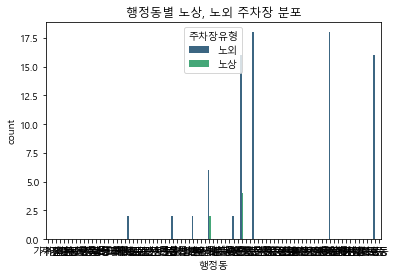

In [232]:
park_dd = sns.countplot(x = daeduckgu['행정동'], hue = daeduckgu['주차장유형'], palette = 'viridis')
park_dd.set_title('행정동별 노상, 노외 주차장 분포')

## 지역사회건강조사(흡연율)
8 = 해당안됨  
즉 8번은 비흡연, 그 외는 흡연자

체크리스트
* 총 응답인원 대비 흡연율
  * 남자 응답자 흡연율
  * 여자 응답자 흡연율
* 구 별 흡연율
  * 구 별 성별에 따른 흡연율


In [233]:
survey = df[df['구분']=='설문'].reset_index()
survey.head(3)

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
0,0,설문,대덕구,1,0.0,0.0,0,0,0,0,0,0,0,0,0,남자,1,8,0,0,0,0,0
1,1,설문,대덕구,1,0.0,0.0,0,0,0,0,0,0,0,0,0,여자,8,8,0,0,0,0,0
2,2,설문,대덕구,1,0.0,0.0,0,0,0,0,0,0,0,0,0,여자,8,8,0,0,0,0,0


## 인구

체크리스트

* 구 별 인구분포
  * 취약계층 인구분포
* 동 별 인구분포
  * 취약계층 인구분포
* 지역사회건강조사에서 동별, 성별별 흡연율이 구해졌다면 총 인구에 흡연율을 적용해보기


In [234]:
population = df[df['구분']=='인구'].reset_index()
population.head(3)

,index,구분,구,행정동,경도,위도,부과일자,최초본세,분류,이름,병원유형,주차장유형,대분류,중분류,소분류,성별,담배흡연,액상흡연,total,0~19세,20~39세,40~59세,60 over
0,1870,인구,대덕구,대화동,0.0,0.0,0,0,0,0,0,0,0,0,0,남자,0,0,3520,365,818,1240,1097
1,1871,인구,대덕구,대화동,0.0,0.0,0,0,0,0,0,0,0,0,0,여자,0,0,3184,297,648,994,1245
2,3086,인구,대덕구,덕암동,0.0,0.0,0,0,0,0,0,0,0,0,0,남자,0,0,7141,872,2125,2466,1678


In [235]:
population.isnull().sum()

index      0
구분         0
구          0
행정동        0
경도         0
위도         0
부과일자       0
최초본세       0
분류         0
이름         0
병원유형       0
주차장유형      0
대분류        0
중분류        0
소분류        0
성별         0
담배흡연       0
액상흡연       0
total      0
0~19세      0
20~39세     0
40~59세     0
60 over    0
dtype: int64

In [236]:
po_by = population.groupby(['행정동']).sum()

In [237]:
po_by

,index,경도,위도,최초본세,total,0~19세,20~39세,40~59세,60 over
행정동,,,,,,,,,
1,0,0.0,0.0,0,0,0,0,0,0
가수원동,75059,0.0,0.0,0,10755,1523,2399,3360,3473
가양1동,38287,0.0,0.0,0,13171,1646,3177,4111,4237
가양2동,41139,0.0,0.0,0,18064,2444,4732,5702,5186
가장동,76779,0.0,0.0,0,11094,1682,2723,3536,3153
갈마1동,80439,0.0,0.0,0,21494,2510,7750,6249,4985
갈마2동,84695,0.0,0.0,0,24404,3062,9543,7482,4317
관저1동,86637,0.0,0.0,0,15125,2564,4557,4836,3168
관저2동,93235,0.0,0.0,0,48993,11369,13590,17048,6986
